# Listing skills for each job category

**Problem:** You are given a DataFrame with one column of skills and another column of corresponding job categories. Which skill(s) are most closely associated with each job category?

# Example input DataFrame

![Example of starting DataFrame](skills-categories-example.png)

# Build the above DataFrame

In [1]:
d = {
        'Skills':
        [
            'human resources;leadership;business development',
            'creative thinking;marketing communications',
            'microsoft excel', 
            'marketing communications;animated video', 
            'thesis;environmental management;industry analysis', 
            'creative vision;branding'
        ],
        'Categories':
        [
            'business services;sales & marketing',
            'writing & translation;business services;sales & marketing',
            'administrative support;business services',
            'design & multimedia;sales & marketing',
            'writing & translation;business services',
            'design & multimedia;business services;sales & marketing'
        ]
    }

In [2]:
import pandas as pd
df_example = pd.DataFrame(d)

In [3]:
# Reorder columns to match input example
df = df_example[['Skills', 'Categories']]
df

,Skills,Categories
0,human resources;leadership;business development,business services;sales & marketing
1,creative thinking;marketing communications,writing & translation;business services;sales ...
2,microsoft excel,administrative support;business services
3,marketing communications;animated video,design & multimedia;sales & marketing
4,thesis;environmental management;industry analysis,writing & translation;business services
5,creative vision;branding,design & multimedia;business services;sales & ...


# Try 1: build a python dictionary that maps jobs to skills
The naive approach to the problem at hand is to build a dictionary that maps each job category to a list of required skills as mentioned in the original DataFrame. This approach doesn't involve any actual machine-learning, but it might just be good enough, depending on the size of the input data.

In [4]:
from collections import defaultdict
job2skills = defaultdict(list)

In [5]:
# Split out each semicolon-delimited string into a nested list of 
# individual skills and job categories. Each top-level list
# entry is one row in the original DF.
skills = [s.split(';') for s in d['Skills']]
categories = [c.split(';') for c in d['Categories']]

In [6]:
skills

[['human resources', 'leadership', 'business development'],
 ['creative thinking', 'marketing communications'],
 ['microsoft excel'],
 ['marketing communications', 'animated video'],
 ['thesis', 'environmental management', 'industry analysis'],
 ['creative vision', 'branding']]

In [7]:
# This seems inefficient, but I don't know enough about 
# Python to improve it.
# Build a dictionary "job2skills" that maps each job 
# category to a list of skills.
for currcat, currskill in zip(categories, skills):
    for c in currcat:
        for s in currskill:
            if s not in job2skills[c]:
                job2skills[c].append(s)

In [8]:
dict(job2skills)

{'administrative support': ['microsoft excel'],
 'business services': ['human resources',
  'leadership',
  'business development',
  'creative thinking',
  'marketing communications',
  'microsoft excel',
  'thesis',
  'environmental management',
  'industry analysis',
  'creative vision',
  'branding'],
 'design & multimedia': ['marketing communications',
  'animated video',
  'creative vision',
  'branding'],
 'sales & marketing': ['human resources',
  'leadership',
  'business development',
  'creative thinking',
  'marketing communications',
  'animated video',
  'creative vision',
  'branding'],
 'writing & translation': ['creative thinking',
  'marketing communications',
  'thesis',
  'environmental management',
  'industry analysis']}

### Insights
- Admin support is associated with only one skill: MS Excel.
- Design and multimedia only has four skills, whereas business services has many.

It might be useful to count the number of unique job->skill connections in the input DataFrame...

# Try 1.5: Count frequency of each skill with a defaultdict of dicts

We can capture the relative importance of skills by counting how many unique category-skill relationships exist in the original DataFrame.

In [9]:
job2skills = defaultdict(dict)

In [10]:
for currcat, currskill in zip(categories, skills):
    for c in currcat:
        for s in currskill:
            if s in job2skills[c].keys():
                job2skills[c][s] += 1
            else:
                job2skills[c][s] = 1

In [11]:
dict(job2skills)

{'administrative support': {'microsoft excel': 1},
 'business services': {'branding': 1,
  'business development': 1,
  'creative thinking': 1,
  'creative vision': 1,
  'environmental management': 1,
  'human resources': 1,
  'industry analysis': 1,
  'leadership': 1,
  'marketing communications': 1,
  'microsoft excel': 1,
  'thesis': 1},
 'design & multimedia': {'animated video': 1,
  'branding': 1,
  'creative vision': 1,
  'marketing communications': 1},
 'sales & marketing': {'animated video': 1,
  'branding': 1,
  'business development': 1,
  'creative thinking': 1,
  'creative vision': 1,
  'human resources': 1,
  'leadership': 1,
  'marketing communications': 2},
 'writing & translation': {'creative thinking': 1,
  'environmental management': 1,
  'industry analysis': 1,
  'marketing communications': 1,
  'thesis': 1}}

### Insights
Every job-to-skill relationship in the example DataFrame is unique, except for sales and marketing. We see that there were *two* connections from sales and marketing to the skill "marketing communications."

## Plotting job-skill relationships

In [28]:
df2 = pd.DataFrame(job2skills).fillna(0).astype(int)

In [30]:
df2

,administrative support,business services,design & multimedia,sales & marketing,writing & translation
animated video,0,0,1,1,0
branding,0,1,1,1,0
business development,0,1,0,1,0
creative thinking,0,1,0,1,1
creative vision,0,1,1,1,0
environmental management,0,1,0,0,1
human resources,0,1,0,1,0
industry analysis,0,1,0,0,1
leadership,0,1,0,1,0
marketing communications,0,1,1,2,1


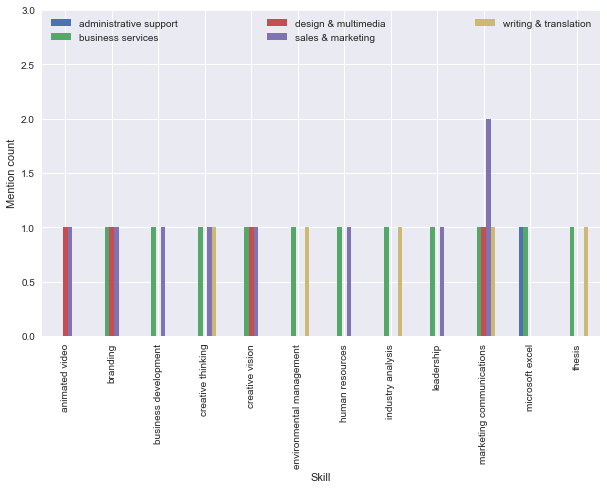

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1, 1, figsize=(10,6))
df2.plot(kind='bar', ax=ax)
plt.ylim([0, 3])
plt.legend(ncol=3, mode='expand')
plt.xlabel('Skill')
plt.ylabel('Mention count')

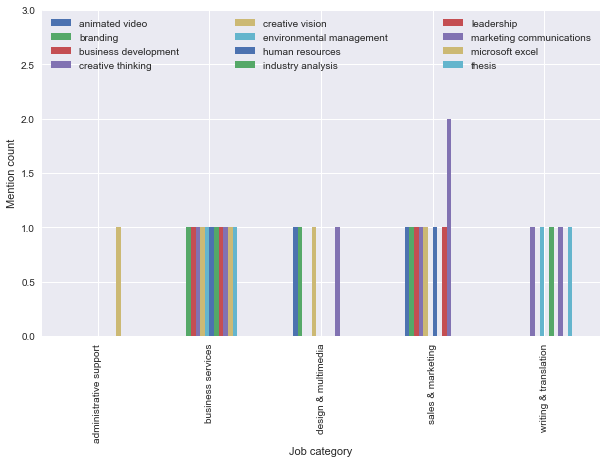

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(1, 1, figsize=(10,6))
df2.T.plot(kind='bar', ax=ax)
plt.ylim([0, 3])
plt.legend(ncol=3, mode='expand')
plt.xlabel('Job category')
plt.ylabel('Mention count')

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(1, 1, figsize=(7, 8))
sns.heatmap(df2, linewidths=0.1, linecolor='k')
plt.xticks(rotation=70)

# Try 2: directly in pandas

In [15]:
Skills = df['Skills'].str.split(';', expand=True)
Categories = df['Categories'].str.split(';', expand=True)

In [16]:
Categories

,0,1,2
0,business services,sales & marketing,None
1,writing & translation,business services,sales & marketing
2,administrative support,business services,None
3,design & multimedia,sales & marketing,None
4,writing & translation,business services,None
5,design & multimedia,business services,sales & marketing


In [17]:
Categories_m = pd.melt(Categories.T, var_name='Row', value_name='Category')
Categories_m

,Row,Category
0,0,business services
1,0,sales & marketing
2,0,None
3,1,writing & translation
4,1,business services
5,1,sales & marketing
6,2,administrative support
7,2,business services
8,2,None
9,3,design & multimedia


In [18]:
Skills_m = pd.melt(Skills.T, var_name='Row', value_name='Skill')
Skills_m

,Row,Skill
0,0,human resources
1,0,leadership
2,0,business development
3,1,creative thinking
4,1,marketing communications
5,1,None
6,2,microsoft excel
7,2,None
8,2,None
9,3,marketing communications


In [19]:
df = pd.concat([Categories_m['Category'], Skills_m['Skill']], axis=1)
df.dropna(subset=['Category'], inplace=True)
df.fillna('other', inplace=True)

In [20]:
df2 = df.groupby('Category').agg({'Skill': 'unique'}).reset_index()

In [21]:
df2

,Category,Skill
0,administrative support,[microsoft excel]
1,business services,"[human resources, marketing communications, ot..."
2,design & multimedia,"[marketing communications, creative vision]"
3,sales & marketing,"[leadership, other, animated video]"
4,writing & translation,"[creative thinking, thesis]"
